# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In the nothern hemisphere, as you move away from the equator the temperature decreases.
In the southern hemisphere, as you get closer to the equator the temperature increases.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=146b3ad00c3bf38f88d1a8a1dfd2f9ef1c1056081f27709a18b95f7acf3fb5f0
  Stored in directory: c:\users\sung\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
city_name_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        wind_speed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : atuona
Processing Record 2 of Set 1 : hermanus
City not found. Skipping...
Processing Record 3 of Set 1 : saldanha
Processing Record 4 of Set 1 : dikson
Processing Record 5 of Set 1 : zhigansk
Processing Record 6 of Set 1 : ahipara
Processing Record 7 of Set 1 : kavaratti
Processing Record 8 of Set 1 : romitan
Processing Record 9 of Set 1 : souillac
Processing Record 10 of Set 1 : kapaa
Processing Record 11 of Set 1 : gebre guracha
Processing Record 12 of Set 1 : yellowknife
Processing Record 13 of Set 1 : barrow
Processing Record 14 of Set 1 : avera
Processing Record 15 of Set 1 : yerofey pavlovich
Processing Record 16 of Set 1 : albany
Processing Record 17 of Set 1 : sao joao da barra
Processing Record 18 of Set 1 : kohlu
Processing Record 19 of Set 1 : manuk mangkaw
Processing Record 20 of Set 1 : sorgun
Processing Record 21 of Set 1 : busselton
Processing Record 22 of Set 1 : medina del campo
Pro

Processing Record 33 of Set 4 : port macquarie
Processing Record 34 of Set 4 : fernie
City not found. Skipping...
Processing Record 35 of Set 4 : melfi
Processing Record 36 of Set 4 : mogadouro
Processing Record 37 of Set 4 : ouahigouya
Processing Record 38 of Set 4 : garwolin
Processing Record 39 of Set 4 : chokurdakh
Processing Record 40 of Set 4 : luena
Processing Record 41 of Set 4 : taitung
Processing Record 42 of Set 4 : sorkjosen
Processing Record 43 of Set 4 : taltal
Processing Record 44 of Set 4 : hollins
Processing Record 45 of Set 4 : villaviciosa
Processing Record 46 of Set 4 : nizhneangarsk
Processing Record 47 of Set 4 : alugan
Processing Record 48 of Set 4 : rafaela
Processing Record 49 of Set 4 : porto novo
Processing Record 50 of Set 4 : salta
Processing Record 0 of Set 5 : guerrero negro
Processing Record 1 of Set 5 : nishihara
Processing Record 2 of Set 5 : carnarvon
Processing Record 3 of Set 5 : batang berjuntai
Processing Record 4 of Set 5 : kailua
Processing Reco

Processing Record 18 of Set 8 : muros
Processing Record 19 of Set 8 : luderitz
Processing Record 20 of Set 8 : poum
Processing Record 21 of Set 8 : kumeny
Processing Record 22 of Set 8 : yate
Processing Record 23 of Set 8 : bambanglipuro
Processing Record 24 of Set 8 : katobu
Processing Record 25 of Set 8 : tahta
Processing Record 26 of Set 8 : ratnagiri
Processing Record 27 of Set 8 : nanortalik
Processing Record 28 of Set 8 : dhidhdhoo
Processing Record 29 of Set 8 : okhotsk
Processing Record 30 of Set 8 : conceicao das alagoas
Processing Record 31 of Set 8 : jijiga
Processing Record 32 of Set 8 : sattahip
Processing Record 33 of Set 8 : porto belo
Processing Record 34 of Set 8 : clyde river
Processing Record 35 of Set 8 : rumoi
Processing Record 36 of Set 8 : boa vista
Processing Record 37 of Set 8 : aberdeen
City not found. Skipping...
Processing Record 38 of Set 8 : udachnyy
Processing Record 39 of Set 8 : asfi
Processing Record 40 of Set 8 : yerbogachen
Processing Record 41 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a panda data frame using data retrieved
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,            
                "Humidity" : humidity_list,            
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,            
                "Country" : country_list,
                "Date" : date_list
})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,77.50,68,5,21.00,PF,1660502471
1,Hermanus,-34.4187,19.2345,42.80,61,97,4.59,ZA,1660502735
2,Saldanha,-33.0117,17.9442,48.25,68,0,11.83,ZA,1660502736
3,Dikson,73.5069,80.5464,42.22,98,100,2.82,RU,1660502736
4,Zhigansk,66.7697,123.3711,53.67,96,100,6.11,RU,1660502737
...,...,...,...,...,...,...,...,...,...
548,Sioux Lookout,50.1001,-91.9170,75.27,64,75,5.75,CA,1660502919
549,Verkhniy Lomov,53.4678,43.5511,65.53,62,98,8.23,RU,1660502920
550,Palana,59.1167,159.9667,52.84,92,100,4.83,RU,1660502920
551,Burnie,-41.0667,145.9167,50.94,86,100,10.38,AU,1660502920


In [7]:
# Save city data into a csv file
weather_df.to_csv("output_data/cities2.csv", index = False)

In [8]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,20.581284,19.753477,70.420000,70.206148,55.804702,7.710850,1.660503e+09
std,32.622054,91.125361,14.622484,22.285715,40.629265,5.351474,9.278763e+01
min,-54.800000,-175.200000,32.470000,1.000000,0.000000,0.000000,1.660502e+09
25%,-5.198900,-61.300300,59.310000,59.000000,14.000000,3.670000,1.660503e+09
50%,25.286700,25.570100,73.650000,75.000000,70.000000,6.510000,1.660503e+09
75%,47.866700,102.661900,80.940000,87.000000,100.000000,10.380000,1.660503e+09
max,78.218600,179.316700,104.040000,100.000000,100.000000,34.690000,1.660503e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.

Skipping as I do not see cities with humidity level above 100%.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

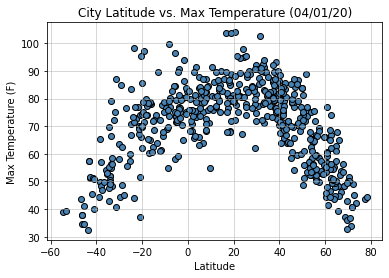

In [10]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output_data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

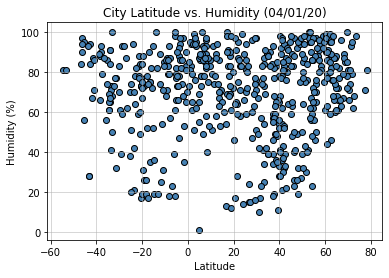

In [12]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

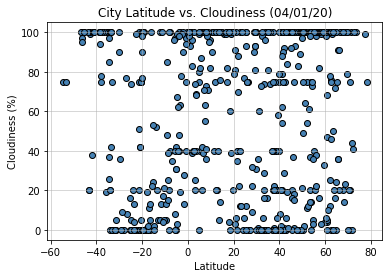

In [13]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

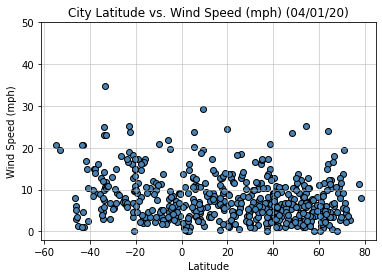

In [14]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("output_data/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [42]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.48x + 90.04


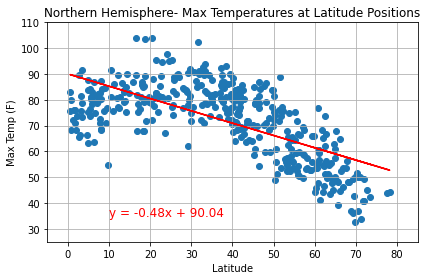

The r-squared is: -0.6710035323167975
The regression displays a negative correlation.


<Figure size 432x288 with 0 Axes>

In [45]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.title('Northern Hemisphere- Max Temperatures at Latitude Positions')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.ylim(25, 110)
plt.xlim(-5, 85)
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()

print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
plt.savefig("output_data/nh_temp_vs_lat_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.79x + 83.36
The r-squared is: 0.7192817758204307
The regression displays a positive correlation.


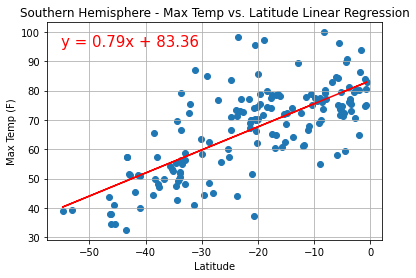

In [47]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")

plt.savefig("output_data/sh_temp_vs_lat_regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.04x + 69.09
The r-squared is: 0.03618308749285161
No correlationship is seen between the data sets.


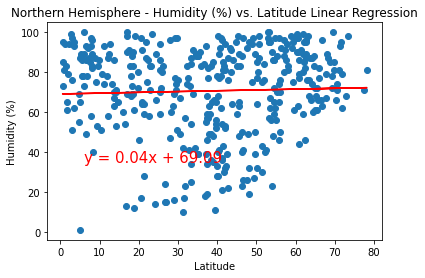

In [29]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("No correlationship is seen between the data sets.") 

plt.savefig("output_data/nh_humidity_vs_lat_regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.12x + 66.78
The r-squared is: -0.07075534209344198
No correlationship is seen between the data sets.


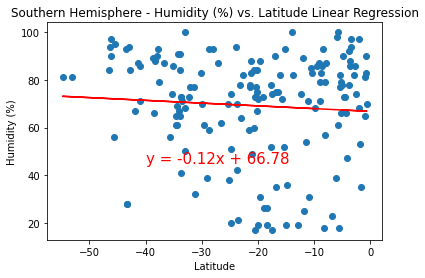

In [48]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("No correlationship is seen between the data sets.") 

plt.savefig("output_data/sh_humidity_vs_lat_regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.15x + 64.57
The r-squared is: -0.07431918453022912
No correlationship is seen between the data sets.


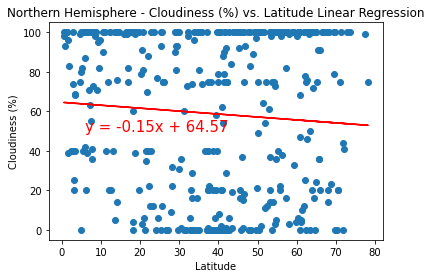

In [49]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("No correlationship is seen between the data sets.") 

plt.savefig("output_data/nh_cloudiness_vs_lat_regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.49x + 38.15
The r-squared is: -0.16191050924845896
No correlationship is seen between the data sets.


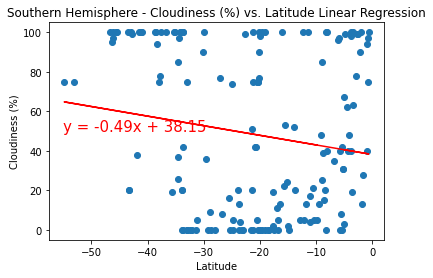

In [50]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("No correlationship is seen between the data sets.") 

plt.savefig("output_data/sh_cloudiness_vs_lat_regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.02x + 7.89
The r-squared is: -0.09040426721924576
No correlationship is seen between the data sets.


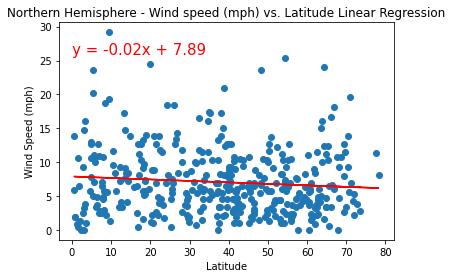

In [51]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,26),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("No correlationship is seen between the data sets.") 

plt.savefig("output_data/nh_wind_vs_lat_regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.12x + 6.72
The r-squared is: -0.26933236058899074
No correlationship is seen between the data sets.


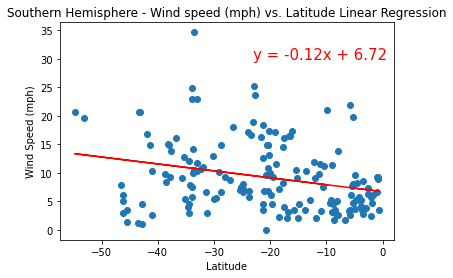

In [52]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("No correlationship is seen between the data sets.") 

plt.savefig("output_data/sh_wind_vs_lat_regression.png")
plt.show()

## Reference codes below:

In [13]:
Reference:

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


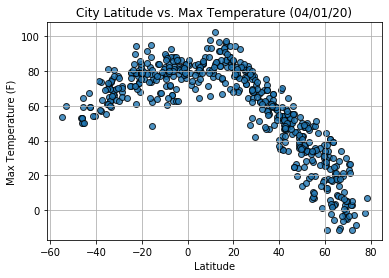

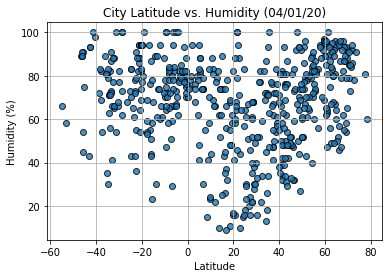

The r-value is: 0.46937863826630627


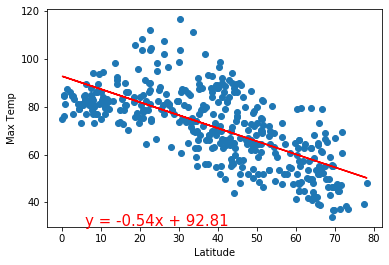

The r-value is: 0.6082708688906918


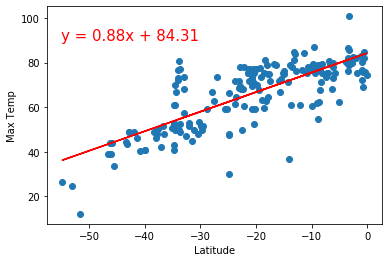

The r-value is: 0.000543987878808455


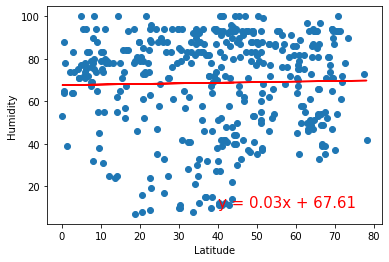

The r-value is: 0.014985174297345524


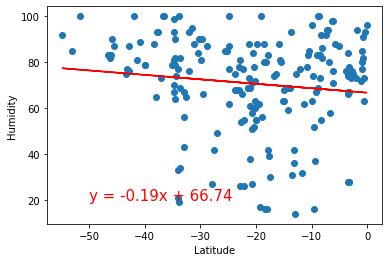

The r-value is: 0.0020898727664228514


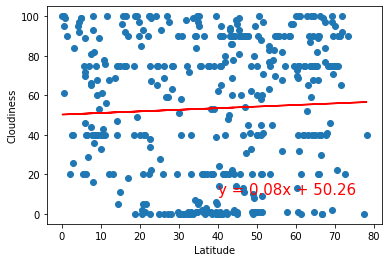

The r-value is: 0.0035263772085582894


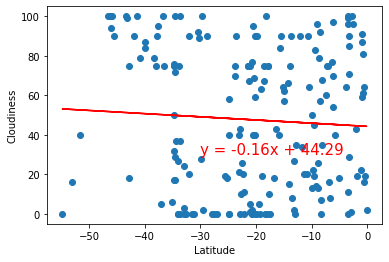

The r-value is: 0.04019723576144484


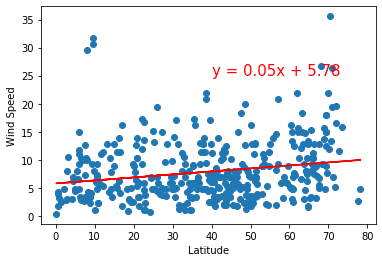

The r-value is: 0.017128274759839232


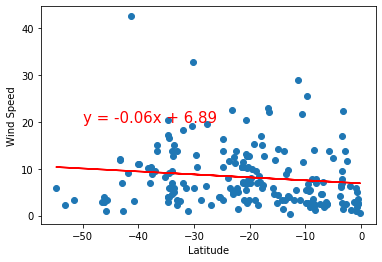